---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable's]`

Convert the energy supply and the energy supply per capita to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102), which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country.

*This function should return a DataFrame with 20 columns and 15 entries.*

In [84]:
def answer_one():
    import pandas as pd
    import numpy as np
    
    #Energy dataframe
    cols = [2,3,4,5] #select columns required for dataframe
    energy = pd.read_excel('C:/Users/copla/Desktop/Python/Intro-to-Data-Science-in-Python/ClassNotebooks/Energy Indicators.xls',sheet_name='Energy',usecols=cols,skiprows=17,skipfooter=38)
    energy.columns = ('Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable')    #change column names
    energy['Energy Supply']*=1000000    #convert petajoules to gigajoules
    #replace missing values with NaN
    for col in energy :
        energy[col] = energy[col].replace('...',np.NaN)

    energy['Country'] = energy['Country'].str.replace(r" \(.*\)","")    # Remove parenthesis
    energy['Country'] = energy['Country'].str.replace('\d+', '')    # Remove digits from names
    energy['Country'] = energy['Country'].replace({'United States of America': 'United States','United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
                                                    'China, Hong Kong Special Administrative Region': 'Hong Kong'}) # Replace country names

    #GDP dataframe
    gdp = pd.read_csv('C:/Users/copla/Desktop/Python/Intro-to-Data-Science-in-Python/ClassNotebooks/world_bank.csv',skiprows=3) #skip header

    # Make first row the column names
    new_header = gdp.iloc[0]
    gdp = gdp[1:]
    gdp.columns = new_header

    gdp['Country Name'] = gdp['Country Name'].replace({'Korea, Rep.': 'South Korea', 'Iran, Islamic Rep.': 'Iran','Hong Kong SAR, China': 'Hong Kong'}) #replace country names
    gdp.rename(columns={'Country Name':'Country'}, inplace=True)    #change column name to 'Country' for merging
    gdp = gdp.drop(gdp.iloc[:,1:50], axis=1)    #drop columns outside of 2006-2015
    gdp.columns = gdp.columns.astype(str).str.split('.').str[0]

    #ScimEn Dataframe
    ScimEn = pd.read_excel('C:/Users/copla/Desktop/Python/Intro-to-Data-Science-in-Python/ClassNotebooks/scimagojr-3.xlsx')

    #join the energy, gdp and ScimEn dataframes
    new_data = pd.merge(ScimEn,energy, on='Country')
    final_data = pd.merge(new_data,gdp, on='Country')
    final_data = final_data[:15]
    final_data_1 = final_data.set_index('Country')

    return final_data_1

answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,10431000000,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,13261000000,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,33195000000,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,10597000000,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [85]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [86]:
def answer_two():
    import pandas as pd
    import numpy as np
    
    #Energy dataframe
    cols = [2,3,4,5] #select columns required for dataframe
    energy = pd.read_excel('C:/Users/copla/Desktop/Python/Intro-to-Data-Science-in-Python/ClassNotebooks/Energy Indicators.xls',sheet_name='Energy',usecols=cols,skiprows=17,skipfooter=38)
    energy.columns = ('Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable')    #change column names
    energy['Energy Supply']*=1000000    #convert petajoules to gigajoules
    #replace missing values with NaN
    for col in energy :
        energy[col] = energy[col].replace('...',np.NaN)

    energy['Country'] = energy['Country'].str.replace(r" \(.*\)","")    # Remove parenthesis
    energy['Country'] = energy['Country'].str.replace('\d+', '')    # Remove digits from names
    energy['Country'] = energy['Country'].replace({'United States of America': 'United States','United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
                                                    'China, Hong Kong Special Administrative Region': 'Hong Kong'}) # Replace country names

    #GDP dataframe
    gdp = pd.read_csv('C:/Users/copla/Desktop/Python/Intro-to-Data-Science-in-Python/ClassNotebooks/world_bank.csv',skiprows=3) #skip header

    # Make first row the column names
    new_header = gdp.iloc[0]
    gdp = gdp[1:]
    gdp.columns = new_header

    gdp['Country Name'] = gdp['Country Name'].replace({'Korea, Rep.': 'South Korea', 'Iran, Islamic Rep.': 'Iran','Hong Kong SAR, China': 'Hong Kong'}) #replace country names
    gdp.rename(columns={'Country Name':'Country'}, inplace=True)    #change column name to 'Country' for merging
    gdp = gdp.drop(gdp.iloc[:,1:50], axis=1)    #drop columns outside of 2006-2015
    gdp.columns = gdp.columns.astype(str).str.split('.').str[0]

    #ScimEn Dataframe
    ScimEn = pd.read_excel('C:/Users/copla/Desktop/Python/Intro-to-Data-Science-in-Python/ClassNotebooks/scimagojr-3.xlsx')

    #join the energy, gdp and ScimEn dataframes
    new_data = pd.merge(ScimEn,energy, on='Country')
    final_data = pd.merge(new_data,gdp, on='Country')
    
    num_outer = len(pd.concat([ScimEn['Country'],energy['Country'],gdp['Country']]).unique())
    num_inter = (gdp.merge(energy, left_on='Country', right_on='Country', how='inner').merge(ScimEn, left_on='Country', right_on='Country', how='inner').shape[0])
    
    #final_data = final_data[:15]
    final_data_1 = final_data.set_index('Country')

    return num_outer - num_inter
answer_two()

158

### Question 3 (6.6%)
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [87]:
def answer_three():

    import pandas as pd
    import numpy as np

    Top15 = answer_one()
    Top15['avg'] = Top15.iloc[:,10:].mean(axis=1)
    #sort values here
    return Top15.head()
answer_three()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,avg
Country,,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,127191000000,93.0,19.75491,...,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12,6.348609e+12
United States,2,96661,94747,792274,265436,8.20,230,90838000000,286.0,11.57098,...,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13,1.536434e+13
Japan,3,30504,30287,223024,61554,7.31,134,18984000000,149.0,10.23282,...,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12,5.542208e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7920000000,124.0,10.60047,...,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12,2.487907e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,30709000000,214.0,17.28868,...,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12,1.565459e+12


### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [88]:
def answer_four():
    Top15 = answer_one()
    return 'ANSWER'
answer_four()

'ANSWER'

### Question 5 (6.6%)
What is the mean energy supply per capita?

*This function should return a single number.*

In [89]:
def answer_five():
    Top15 = answer_one()
    return Top15.iloc[:,8].mean()
answer_five()

147.13333333333333

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [90]:
def answer_six():
    Top15 = answer_one()
    maxRen = (Top15.iloc[:,9].idxmax(), Top15.iloc[:,9].max())
    #Top15.sort_values(Top15.iloc[:,9],ascending=False)
    return maxRen
answer_six()

('Brazil', 69.64803)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [91]:
def answer_seven():
    Top15 = answer_one()
    Top15['ratio'] = Top15['Self-citations'] / Top15['Citations']
    return (Top15['ratio'].idxmax(),Top15['ratio'].max())
answer_seven()

('China', 0.6893126179389422)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [92]:
def answer_eight():
    Top15 = answer_one()
    Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).astype(float)  
    return Top15['PopEst'].sort_values(ascending=False).index[2]
answer_eight()

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita?

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita).*

In [93]:
def answer_nine():
    Top15 = answer_one()
    Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).astype('float')
    Top15['Citable docs per Capita'] = (Top15['Citable documents'] / Top15['PopEst']).astype('float')
    answer = Top15['Citable docs per Capita'].corr(Top15['Energy Supply per Capita'])
    return answer
answer_nine()

0.8157267557182423

In [94]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'].astype('float') / Top15['Energy Supply per Capita'].astype('float')
    Top15['Citable docs per Capita'] = Top15['Citable documents'].astype('float') / Top15['PopEst'].astype('float')
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

In [95]:
#plot9()

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [96]:
def answer_ten():

    import numpy as np

    Top15 = answer_one()
    med = Top15['% Renewable'].median(axis=0)
    Top15['HighRenew'] = np.where(Top15['% Renewable'] > med,1,0)
    return Top15['HighRenew']
answer_ten()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    0
Canada                1
Germany               1
India                 0
France                0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Turkey                1
Name: HighRenew, dtype: int32

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [102]:
def answer_eleven():

    import pandas as pd
    import numpy as np 

    Top15 = answer_one()

    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
            
    Top15['Continent'] = Top15.index.to_series().map(ContinentDict)
    #reintroduce 'PpoEst' to dataframe
    Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).astype('float')
    # agg appies functions to a group of values.
    cont = Top15.set_index('Continent').groupby(level = 0)['PopEst'].agg({'size':np.size, 'sum':np.sum, 'mean':np.mean, 'std':np.std})

    return cont

answer_eleven()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


,size,sum,mean,std
Continent,,,,
Asia,4.0,2.848861e+09,7.122152e+08,7.056123e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [106]:
def answer_twelve():
    import pandas as pd
    import numpy as np 

    Top15 = answer_one()

    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
            
    Top15['Continent'] = Top15.index.to_series().map(ContinentDict)

    Top15['Bin'] = pd.cut(Top15['% Renewable'],5)
    ans = Top15.groupby(['Continent','Bin']).size()
    return ans
answer_twelve()

Continent      Bin             
Asia           (5.644, 18.496]     3
               (18.496, 31.284]    1
Australia      (5.644, 18.496]     1
Europe         (5.644, 18.496]     4
               (31.284, 44.072]    2
North America  (5.644, 18.496]     1
               (56.86, 69.648]     1
South America  (56.86, 69.648]     1
dtype: int64

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas)

e.g. 12345678.90 -> 12,345,678.90

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [116]:
def answer_thirteen():
    Top15 = answer_one()

    Top15['PopEst'] = (Top15['Energy Supply'] / Top15['Energy Supply per Capita']).astype('float')
    return Top15['PopEst'].map('{:,.2f}'.format)#.astype(str)
answer_thirteen()

Country
China                 1,367,645,161.29
United States           317,615,384.62
Japan                   127,409,395.97
United Kingdom           63,870,967.74
Russian Federation      143,500,000.00
Canada                   35,239,864.86
Germany                  80,369,696.97
India                 1,276,730,769.23
France                   63,837,349.40
Italy                    59,908,256.88
Spain                    46,443,396.23
Iran                     77,075,630.25
Australia                23,316,017.32
Brazil                  205,915,254.24
Turkey                   76,515,625.00
Name: PopEst, dtype: object

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [114]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


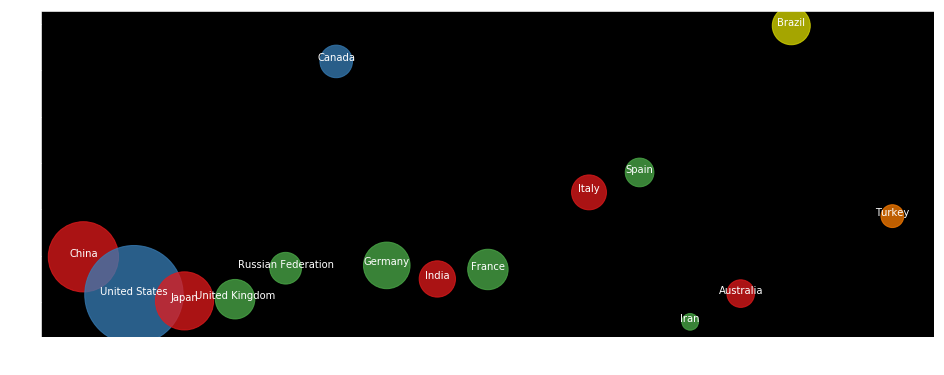

In [115]:
#plot_optional()